In [ ]:
import os
import librosa
import math
import json
import numpy as np
from sklearn.model_selection import train_test_split
import glob, random

In [ ]:
import os
import random
import json
import math
import librosa

# Set your data path
DATASET_PATH = "/content/drive/MyDrive/archive (1)/Data/genres_original"
JSON_PATH = "data_111.json"
SAMPLE_RATE = 22050
duration = 20  # seconds
SAMPLES_PER_TRACK = SAMPLE_RATE * duration

In [ ]:

def save_melspec(dataset_path, json_path, n_fft=2048, hop_length=512, num_segments=40, n_mels=128):
    data = {
        "mapping": [],
        "mels": [],
        "labels": []
    }
    num_samples_per_segment = int(SAMPLES_PER_TRACK / num_segments)
    expected_num_mel_vectors_per_segments = math.ceil(num_samples_per_segment / hop_length)
    for i, (dirpath, dirnames, filenames) in enumerate(os.walk(dataset_path)):
        if dirpath is not dataset_path:
            dirpath_components = dirpath.split("\\")
            semantic_label = dirpath_components[-1]
            #semantic_label = random.sample(semantic_label, 5)
            data["mapping"].append(semantic_label)
            print("\nProcessing {}".format(semantic_label))
            selected_files = random.sample(filenames,10)  # Select up to 5 files randomly
            for f in selected_files:
                file_path = os.path.join(dirpath, f)
                signal, sr = librosa.load(file_path, sr=SAMPLE_RATE)
                # process segments extracting mels and storing data
                for s in range(num_segments):
                    start_sample = num_samples_per_segment * s
                    finish_sample = start_sample + num_samples_per_segment
                    mels = librosa.feature.melspectrogram(y=signal[start_sample:finish_sample],
                                                          sr=SAMPLE_RATE,
                                                          n_fft=n_fft,
                                                          n_mels=n_mels,
                                                          hop_length=hop_length)
                    mels = mels.T
                    if len(mels) == expected_num_mel_vectors_per_segments:
                        data["mels"].append(mels.tolist())
                        data["labels"].append(i - 1)
                        print("{}, segment:{}".format(file_path, s))
    with open(json_path, "w") as fp:
        json.dump(data, fp, indent=4)


if __name__ == "__main__":
    save_melspec(DATASET_PATH, JSON_PATH, num_segments=40)


Processing /content/drive/MyDrive/archive (1)/Data/genres_original/disco
/content/drive/MyDrive/archive (1)/Data/genres_original/disco/disco.00015.wav, segment:0
/content/drive/MyDrive/archive (1)/Data/genres_original/disco/disco.00015.wav, segment:1
/content/drive/MyDrive/archive (1)/Data/genres_original/disco/disco.00015.wav, segment:2
/content/drive/MyDrive/archive (1)/Data/genres_original/disco/disco.00015.wav, segment:3
/content/drive/MyDrive/archive (1)/Data/genres_original/disco/disco.00015.wav, segment:4
/content/drive/MyDrive/archive (1)/Data/genres_original/disco/disco.00015.wav, segment:5
/content/drive/MyDrive/archive (1)/Data/genres_original/disco/disco.00015.wav, segment:6
/content/drive/MyDrive/archive (1)/Data/genres_original/disco/disco.00015.wav, segment:7
/content/drive/MyDrive/archive (1)/Data/genres_original/disco/disco.00015.wav, segment:8
/content/drive/MyDrive/archive (1)/Data/genres_original/disco/disco.00015.wav, segment:9
/content/drive/MyDrive/archive (1)/D

In [ ]:
import json
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow.keras as keras
import matplotlib.pyplot as plt
# Import necessary modules
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

DATA_PATH = "/content/data_111.json"


def load_data(data_path):
    with open(data_path, "r") as fp:
        data = json.load(fp)

    X = np.array(data["mels"])
    y = np.array(data["labels"])
    return X, y


def plot_history(history):
    fig, axs = plt.subplots(2)

    # create accuracy sublpot
    axs[0].plot(history.history["accuracy"], label="train accuracy")
    axs[0].plot(history.history["val_accuracy"], label="test accuracy")
    axs[0].set_ylabel("Accuracy")
    axs[0].legend(loc="lower right")
    axs[0].set_title("Accuracy eval")

    # create error sublpot
    axs[1].plot(history.history["loss"], label="train error")
    axs[1].plot(history.history["val_loss"], label="test error")
    axs[1].set_ylabel("Error")
    axs[1].set_xlabel("Epoch")
    axs[1].legend(loc="upper right")
    axs[1].set_title("Error eval")

    plt.show()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 20, 126, 32)       320       
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 10, 63, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 8, 61, 64)         18496     
                                                                 
 max_pooling2d_19 (MaxPooli  (None, 4, 30, 64)         0         
 ng2D)                                                           
                                                                 
 flatten_9 (Flatten)         (None, 7680)              0         
                                                                 
 dense_18 (Dense)            (None, 64)               

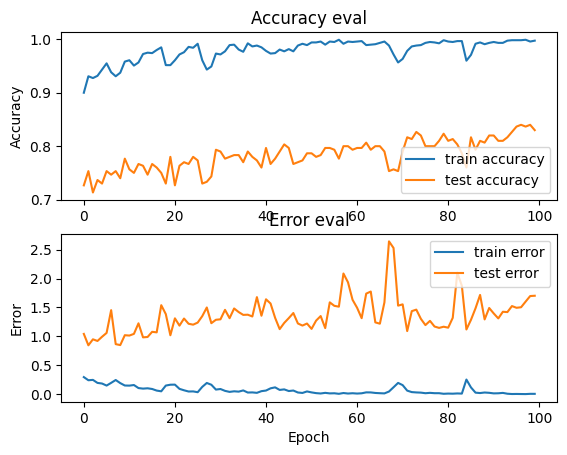

In [ ]:
def prepare_datasets(test_size, validation_size):
    """Loads data and splits it into train, validation and test sets.

    :param test_size (float): Value in [0, 1] indicating percentage of data set to allocate to test split
    :param validation_size (float): Value in [0, 1] indicating percentage of train set to allocate to validation split

    :return X_train (ndarray): Input training set
    :return X_validation (ndarray): Input validation set
    :return X_test (ndarray): Input test set
    :return y_train (ndarray): Target training set
    :return y_validation (ndarray): Target validation set
    :return y_test (ndarray): Target test set
    """

    # load data
    X, y = load_data(DATA_PATH)

    # create train, validation and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)
    X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=validation_size)

    return X_train, X_validation, X_test, y_train, y_validation, y_test



    def build_model(input_shape):
         model = keras.Sequential()
    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=input_shape))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((3, 3), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Dropout(0.1))

    model.add(keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(keras.layers.MaxPooling2D((2, 2), strides=(2, 2), padding='same'))
    model.add(keras.layers.BatchNormalization())

#     # Flatten the output of the last convolutional layer
#     model.add(keras.layers.GlobalMaxPooling2D())

    model.add(keras.layers.Dense(64, activation='relu'))
    model.add(keras.layers.Dropout(0.1))

    model.add(keras.layers.Dense(10, activation='softmax'))

    return model


if __name__ == "__main__":
    # get train, validation, test splits
    X_train, X_validation, X_test, y_train, y_validation, y_test = prepare_datasets(0.25, 0.2)

#     # Reshape input data to include batch and channel dimensions
#     X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
#     X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
    # create network
    input_shape = (X_train.shape[1], X_train.shape[2], 1) # Add channel dimension

    model = build_model(input_shape)


# compile model
optimiser = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer=optimiser,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Train the model with early stopping
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_validation, y_validation), callbacks=[early_stopping])

# train model
history = model.fit(X_train, y_train, validation_data=(X_validation, y_validation), batch_size=32, epochs=100)

# plot accuracy/error for training and validation
plot_history(history)



In [ ]:
 # evaluate model on test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print('\nTest accuracy:', test_acc)

16/16 - 1s - loss: 1.6835 - accuracy: 0.8320 - 591ms/epoch - 37ms/step

Test accuracy: 0.8320000171661377


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1200, 22, 128)
(500, 22, 128)
(1200,)
(500,)


In [ ]:
model=model.save("Model_binaryMelSpec.keras")

In [ ]:
import numpy as np
import tensorflow.keras as keras
import librosa
import matplotlib.pyplot as plt  # Optional, for visualization

class_names = {
    0: "blues",
    1: "classical",
    2: "country",
    3: "disco",
    4: "hiphop"
}

# Load the trained model
model_path = "/content/Model_binaryMelSpec.keras"
model = keras.models.load_model(model_path)

def predict_audio_class(audio_file, model):
    """
    Extracts Mel spectrogram features from an audio file and predicts class probabilities.

    Args:
        audio_file (str): Path to the audio file.
        model (keras.Model): The trained audio classification model.

    Returns:
        tuple: A tuple containing the predicted class index, class probabilities,
               and the Mel spectrogram (optional for visualization).
    """

    # Load audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Compute Mel spectrogram
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)

    # Normalize Mel spectrogram
    mel_spectrogram_normalized = librosa.util.normalize(mel_spectrogram)

    # Get expected input shape from the first layer
    expected_input_shape = model.layers[0].input_shape

    # Print Mel spectrogram and expected input shape for debugging (optional)
    print("Mel spectrogram shape:", mel_spectrogram_normalized.shape)
    print("Expected input shape:", expected_input_shape)

    # Ensure we have the expected number of channels (usually 1 for Mel spectrograms)
    if len(mel_spectrogram_normalized.shape) == 2:
        mel_spectrogram_normalized = np.expand_dims(mel_spectrogram_normalized, axis=-1)  # Add channel dimension

    # Adjust n_mels in librosa if necessary (assuming batch dimension and channel dimension)
    if mel_spectrogram_normalized.shape[1] != expected_input_shape[1]:
        n_mels = expected_input_shape[1]
        mel_spectrogram_normalized = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)

    # Reshape to match expected dimensions
    mel_spectrogram_reshaped = mel_spectrogram_normalized[np.newaxis, ..., np.newaxis]

    # Predict class probabilities
    class_probabilities = model.predict(mel_spectrogram_reshaped)

    # Get the predicted class label
    predicted_class = np.argmax(class_probabilities)

    # Return results
    return predicted_class, class_probabilities, mel_spectrogram_normalized  # Optional for visualization

# Example usage
audio_file_path = "/content/drive/MyDrive/archive (1)/Data/genres_original/classical/classical.00000.wav"
predicted_class, class_probabilities, mel_spectrogram_normalized = predict_audio_class(audio_file_path, model)

# Retrieve the predicted class name using the class probabilities
predicted_class_name = class_names[predicted_class]

# Print the predicted class name and class probabilities
print("Predicted class:", predicted_class_name)
print("Class probabilities:", class_probabilities)

# Optional: Plot the Mel spectrogram for visualization (using matplotlib)
plt.figure(figsize=(10, 4))
plt.imshow(mel_spectrogram_normalized, cmap="hot")
plt.colorbar(label="Mel spectrogram")
plt.title("Mel spectrogram of audio file")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()
